In [27]:
import torch.optim as optim
import torchvision.datasets as dset 
from torchvision.transforms import transforms
import torchvision.utils as vutils
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np

In [28]:
class NoiseClassifier(nn.Module):
    def __init__(self):
        super(NoiseClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [36]:
dataset = dset.ImageFolder(root='../mel-spectrogram/Galitskiy',
                           transform=transforms.Compose([
                               transforms.Resize(64),
                               transforms.CenterCrop(64),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

In [37]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64,
                                         shuffle=True, num_workers=2)
batch = next(iter(dataloader))

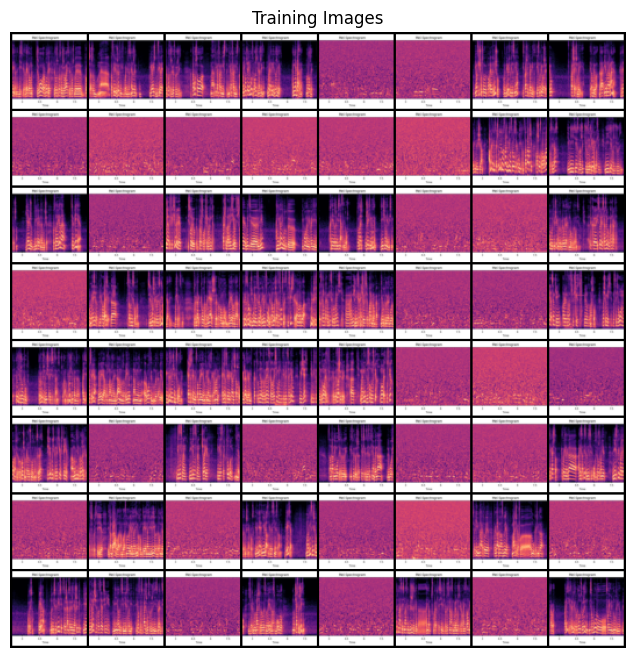

In [38]:
batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(batch[0].to('cpu')[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [40]:
model = NoiseClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

for x, labels in dataloader:
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x120f705e0>
Traceback (most recent call last):
  File "/Users/vladimirdimitrov/Library/Python/3.9/lib/python/site-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/Users/vladimirdimitrov/Library/Python/3.9/lib/python/site-packages/torch/utils/data/dataloader.py", line 1443, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/connection

RuntimeError: Given groups=1, weight of size [32, 1, 3, 3], expected input[64, 3, 64, 64] to have 1 channels, but got 3 channels instead